<a href="https://colab.research.google.com/github/mihhwiNick/DA_project/blob/DA/Copy_of_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **1. Mô tả vấn đề**
Siêu thị đang sở hữu một lượng lớn dữ liệu giao dịch bán hàng nhưng chưa được khai thác hiệu quả. Việc phân tích các mẫu hành vi mua hàng, xu hướng doanh thu theo thời gian, và đặc điểm khách hàng là cần thiết để:

  - Hiểu rõ hoạt động kinh doanh hiện tại.

  - Tối ưu hóa chiến lược bán hàng và tiếp thị.

  - Nâng cao hiệu quả kinh doanh và tăng trưởng doanh thu.

**2. Dữ liệu vào (Input Data)**
**Bộ dữ liệu giao dịch bán hàng với các cột thông tin sau:**

  - **InvoiceNo:** Mã số hóa đơn

  - **StockCode:** Mã sản phẩm

  - **Description:** Mô tả sản phẩm

  - **Quantity:** Số lượng sản phẩm

  - **InvoiceDate:** Ngày và giờ lập hóa đơn

  - **UnitPrice:** Đơn giá sản phẩm

  - **CustomerID:** Mã khách hàng

  - **Country:** Quốc gia

**3. Dữ liệu ra (Output Data)**
**Các báo cáo và biểu đồ trực quan hóa dữ liệu:**

  - Phân tích doanh thu: Theo giờ, ngày, tháng, năm

  - Phân tích khách hàng: Hành vi mua sắm của các quốc gia

  - Phân tích sản phẩm: Sản phẩm bán chạy, sản phẩm ít bán

  - Xu hướng thời gian: Biến động doanh thu theo thời gian

  - Dự báo: Dự báo doanh thu trong tương lai

**4. Mục tiêu (Objectives)**
**Mục tiêu phân tích:**

  - Xác định giờ cao điểm và thấp điểm trong ngày

  - Phân tích xu hướng doanh thu theo thời gian

  - Nhận diện khách hàng tiềm năng và sản phẩm chủ lực

**Mục tiêu kinh doanh:**

  - Tối ưu hóa nhân sự và tồn kho cho các khung giờ cao điểm

  - Xây dựng chiến lược khuyến mãi phù hợp với từng khung giờ

  - Cải thiện trải nghiệm khách hàng và tăng doanh thu 15% trong 6 tháng tới

#**1.Chuẩn bị vấn đề**

##**1.1.Khai báo thư viện**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules

##**1.2.Nạp dữ liệu**

In [30]:
df = pd.read_csv('/content/sample_data/Copy of Online Retail.csv')
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#**2.Data Cleaning**

##**2.1 Kiểm tra và xử lý Giá trị Bị thiếu và không hợp lệ**

In [31]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [33]:
filtered_data = df[df['UnitPrice'] == 0]
print(f"Số lượng giá trị cột UnitPrice = 0 : {len(filtered_data)}")

Số lượng giá trị cột UnitPrice = 0 : 2515


**Đánh giá**
- **Có 2 trường hợp cần xử lý:**
  - **Trường hợp 1:** Với 1454 dòng **Description KHÔNG có giá trị** và **UnitPrice  = 0**. Đây là các bản ghi thiếu thông tin mô tả. Lý do có thể Đồng bộ dữ liệu bị lỗi, mất mô tả, Sản phẩm không xác định hoặc Giao dịch hủy: Đơn hàng bị hủy nhưng còn trong hệ thống **vì vậy cần xóa các giá trị này**.
  - **Trường hợp 2:** Với 2515 cột Description CÓ giá trị, unitPrice = 0. Lý do có thể là, Sản phẩm miễn phí: Quà tặng, sample, sản phẩm khuyến mãi hoặc phí vận chuyển/dịch vụ hoặc các khoản phí được tính riêng vì vậy **không cần xóa các giá trị này**.

- Với cột CustomerID có 135080 dòng bị thiếu có nghĩa là các giao dịch này là của khách vãng lai hoặc các giao dịch mua tại quầy không định danh.
  - Với các dữ liệu bị thiếu này vẫn có thể sử dụng các giao dịch này để phân tích

**Xử lí giá trị bị thiếu và không hợp lệ**

In [34]:
#xóa các giá trị bị thiếu trong cột Description
df.dropna(subset=['Description'], inplace=True)
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64


##**2.2. Xử lý Dữ liệu Trùng lặp**

In [35]:
print(f"Số dòng trùng lặp trước khi xóa: {df.duplicated().sum()}")

# Sửa lại ở đây: gán kết quả của hàm vào biến df
df = df.drop_duplicates()

print(f"Số dòng sau khi xóa trùng lặp: {len(df)}")

Số dòng trùng lặp trước khi xóa: 5268
Số dòng sau khi xóa trùng lặp: 535187


##**2.3. Chuẩn hóa Kiểu dữ liệu và Tạo Cột mới (Feature Engineering)**

In [38]:
# Xử lý tuần tự để tránh lặp lại
df = df.copy()  # Tạo bản copy rõ ràng

# Chuyển đổi InvoiceDate một lần
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Tạo các cột mới
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDayName'] = df['InvoiceDate'].dt.day_name()
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

- Chỉnh sửa Kiểu dữ liệu InvoiceDate: Cột InvoiceDate được chuyển đổi sang kiểu dữ liệu datetime để dễ dàng trích xuất thông tin dựa trên thời gian (như năm, tháng, ngày, giờ).

##**2.4. Kiểm tra lại Dữ liệu sau khi Làm sạch**

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       535187 non-null  object        
 1   StockCode       535187 non-null  object        
 2   Description     535187 non-null  object        
 3   Quantity        535187 non-null  int64         
 4   InvoiceDate     535187 non-null  datetime64[ns]
 5   UnitPrice       535187 non-null  float64       
 6   CustomerID      401604 non-null  float64       
 7   Country         535187 non-null  object        
 8   TotalPrice      535187 non-null  float64       
 9   InvoiceYear     535187 non-null  int32         
 10  InvoiceMonth    535187 non-null  int32         
 11  InvoiceDayName  535187 non-null  object        
 12  InvoiceHour     535187 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(5)
memory usage: 51.0+ MB


In [40]:
num_rows = len(df)
print(f"Số dòng dữ liệu trong DataFrame là: {num_rows}")

Số dòng dữ liệu trong DataFrame là: 535187


**Kỹ thuật Đặc trưng (Feature Engineering)**

- Một số cột mới đã được tạo ra để làm phong phú thêm bộ dữ liệu và hỗ trợ cho việc phân tích sâu hơn:

- TotalPrice: Được tính bằng Quantity * UnitPrice, đại diện cho tổng doanh thu của mỗi dòng giao dịch.

- Các Thành phần Thời gian: Các cột như InvoiceYear, InvoiceMonth, InvoiceDay, InvoiceHour. Các đặc trưng này rất hữu ích để phân tích xu hướng bán hàng theo thời gian (ví dụ: xu hướng theo tháng, theo ngày trong tuần, hoặc các giờ cao điểm).

**Tóm tắt Bộ dữ liệu sau khi Làm sạch & Kỹ thuật Đặc trưng**
- Sau khi trải qua tất cả các bước làm sạch và kỹ thuật đặc trưng, bộ dữ liệu hiện đã sẵn sàng cho các phân tích sâu hơn.

- Tổng số dòng cuối cùng: 535187

- Tổng số cột cuối cùng: 13 (8 cột ban đầu cộng với 5 cột mới được tạo ra)

- Thống kê Mô tả: Các thống kê mô tả cung cấp một cái nhìn tổng quan về sự phân bổ giá trị trong các cột dạng số như Quantity, UnitPrice, và TotalPrice.

#**3.EDA-Phân tích dữ liệu**
***Chúng ta đang bán hàng như thế nào?***

##**3.1.Phân tích Đơn biến (Univariate Analysis)**

**Trước tiên, hãy cùng xem hoạt động kinh doanh của chúng ta theo dòng thời gian. Khi nào là thời điểm chúng ta bán hàng hiệu quả nhất?**

###**3.1.1.Phân tích Doanh số Hàng tháng (Xu hướng Bán hàng Tháng):**

**Xu hướng doanh thu hàng tháng cho chúng ta biết điều gì? Tháng nào đỉnh điểm, tháng nào trũng? Chúng ta có thể chuẩn bị gì cho những mùa cao điểm?**

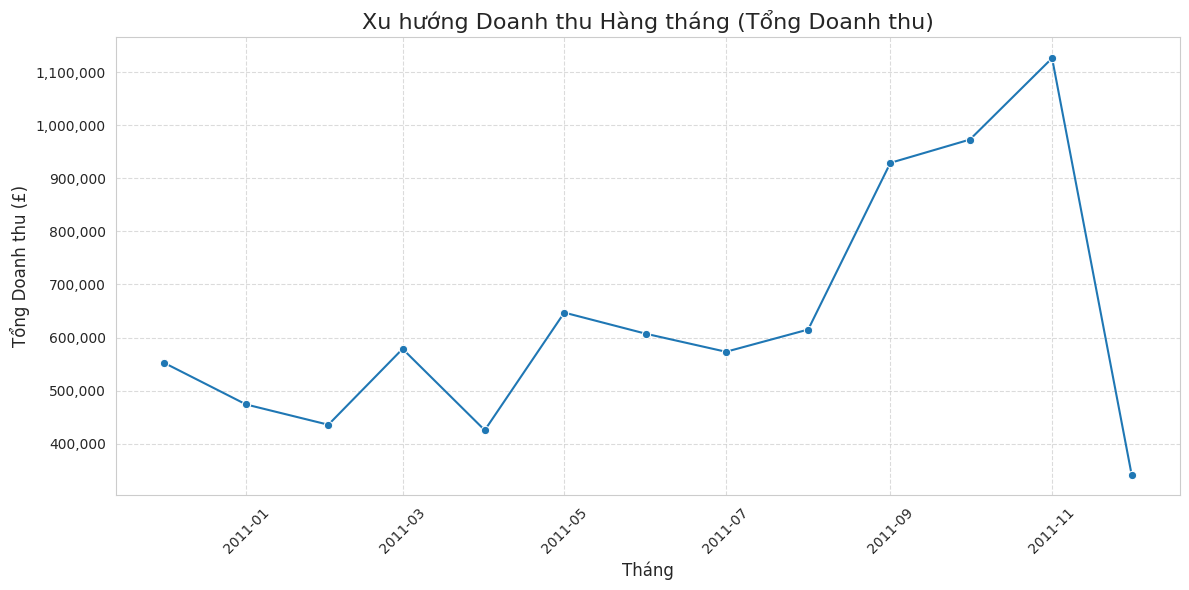

In [63]:
sns.set_style("whitegrid")
monthly_sales = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalPrice'].sum().reset_index()
monthly_sales['YearMonth'] = pd.to_datetime(monthly_sales['InvoiceYear'].astype(str) + '-' + monthly_sales['InvoiceMonth'].astype(str) + '-01')

# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales, marker='o')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Xu hướng Doanh thu Hàng tháng (Tổng Doanh thu)', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Tổng Doanh thu (£)', fontsize=12)

# Định dạng số trên trục y để hiển thị số cụ thể
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Tinh chỉnh thêm cho biểu đồ
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()


# Hiển thị biểu đồ
plt.show()

**Đánh giá:**
- Doanh thu đạt đỉnh cao nhất vào tháng 11 năm 2011 với hơn 1,5 triệu, trong khi tháng 2 cùng năm ghi nhận mức doanh thu thấp nhất là 523,084.

- Mô hình theo mùa: phần lớn doanh thu tập trung vào quý cuối cùng của năm (đặc biệt là gần cuối năm). Sau đỉnh điểm vào tháng 11, doanh thu tháng 12 sụt giảm mạnh (có thể do dữ liệu của tháng này không đầy đủ). Xu hướng thông thường là doanh thu sẽ giảm vào tháng 1 sau khi đạt đỉnh trong kỳ nghỉ lễ.

###**3.1.2.Phân tích Doanh số theo Ngày trong Tuần**

**Doanh số theo ngày trong tuần nói lên điều gì? Khách hàng có thích mua sắm vào cuối tuần hơn không?**

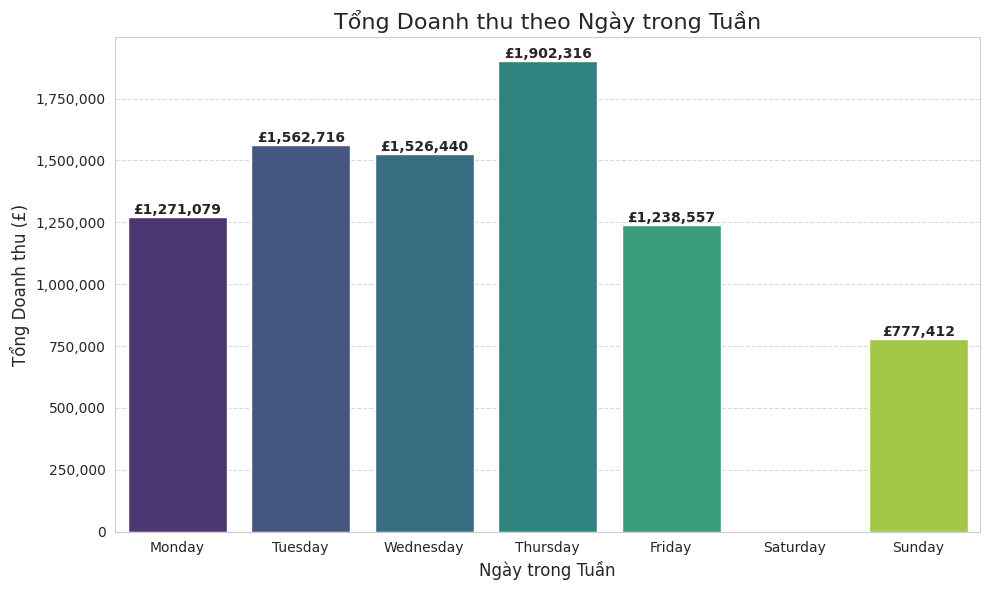

In [64]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df.groupby('InvoiceDayName')['TotalPrice'].sum().reindex(day_order).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='InvoiceDayName', y='TotalPrice', data=sales_by_day, palette='viridis', hue='InvoiceDayName', legend=False)

plt.title('Tổng Doanh thu theo Ngày trong Tuần', fontsize=16)
plt.xlabel('Ngày trong Tuần', fontsize=12)
plt.ylabel('Tổng Doanh thu (£)', fontsize=12)

# Định dạng số trên trục y để hiển thị số cụ thể
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Thêm nhãn giá trị lên trên mỗi cột
for i, v in enumerate(sales_by_day['TotalPrice']):
    ax.text(i, v, f'£{v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Những phát hiện chính:**

- Nhịp điệu mua sắm: Khách hàng có xu hướng dành thời gian mua sắm nhiều hơn vào các ngày trong tuần.

- Thứ Năm là điểm đáng chú ý: Sự gia tăng doanh thu vào Thứ Năm có thể do:

  - Khách hàng mua sắm chuẩn bị cho cuối tuần.

  - Các chiến dịch khuyến mãi thường được triển khai vào thời điểm này.

**Câu hỏi: Tại sao doanh thu vào Chủ Nhật lại thấp như vậy?**

  - Nếu doanh nghiệp vẫn mở cửa, có thể nhu cầu mua sắm vào Chủ Nhật của khách hàng thấp một cách tự nhiên. Điều này có thể do thói quen của họ (chỉ mua sắm hoặc làm việc vào các ngày trong tuần) hoặc do ngành hàng này thường không có hoạt động sôi nổi vào cuối tuần.

###**3.1.3.Phân tích Doanh số theo Giờ**

**Theo từng giờ trong ngày, khung giờ vàng để bán hàng là khi nào? Tại sao doanh thu lại có đỉnh điểm rõ rệt vào các khung giờ cao điểm?**

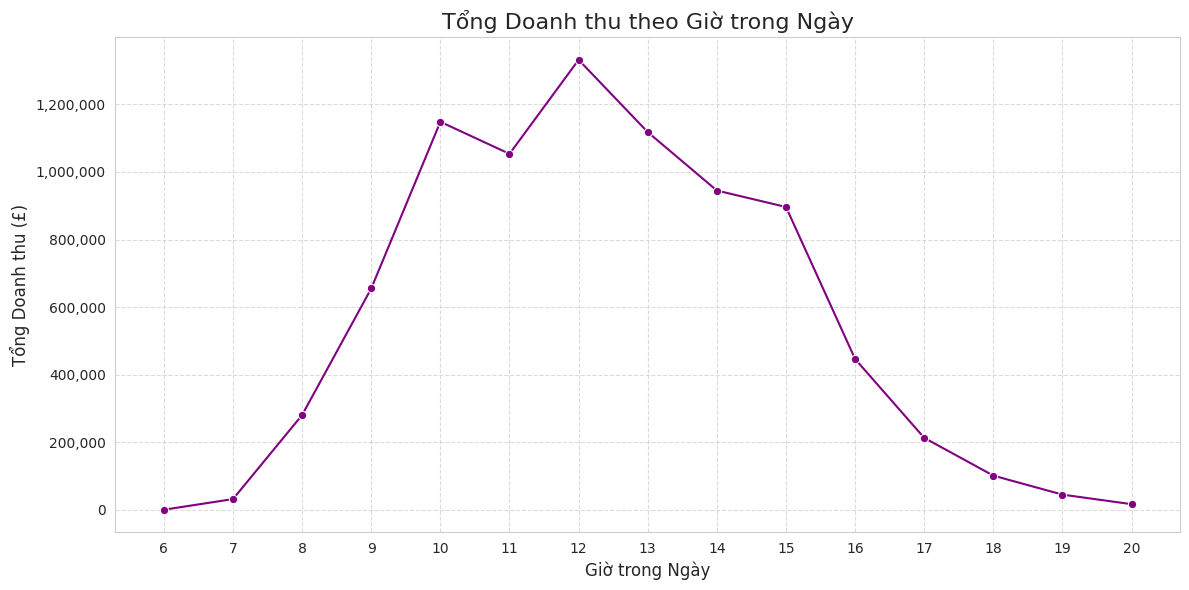

In [65]:
sns.set_style("whitegrid")
sales_by_hour = df.groupby('InvoiceHour')['TotalPrice'].sum().reset_index()

# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường
sns.lineplot(x='InvoiceHour', y='TotalPrice', data=sales_by_hour, marker='o', color='purple')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Tổng Doanh thu theo Giờ trong Ngày', fontsize=16)
plt.xlabel('Giờ trong Ngày', fontsize=12)
plt.ylabel('Tổng Doanh thu (£)', fontsize=12)

# Định dạng số trên trục y để hiển thị số cụ thể
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Tinh chỉnh thêm cho biểu đồ
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(int(df['InvoiceHour'].min()), int(df['InvoiceHour'].max()) + 1))
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

**Những phát hiện chính:**
- Thời gian tương đối cao điểm: Doanh thu duy trì ở mức cao từ 10 giờ sáng đến 15 giờ chiều, với một đỉnh nhỏ vào khoảng 15 giờ.

- Thời gian thấp điểm: Doanh thu giảm mạnh sau 15 giờ chiều và gần như bằng 0 sau 19 giờ tối.

- Giờ mở cửa và đóng cửa: Dựa vào biểu đồ, có thể thấy doanh nghiệp hoạt động từ khoảng 6 giờ sáng đến 20 giờ tối

**Câu hỏi: Tại sao doanh thu lại có hai đỉnh điểm rõ rệt vào 10 giờ sáng và 12 giờ trưa?**
- Hai đỉnh này có thể phản ánh thói quen mua sắm của khách hàng. 2 khung giờ này trùng với giờ nghỉ trưa, khi nhiều người có thời gian để mua sắm hoặc ăn uống.

###**3.1.4.Phân tích số lượng đơn hàng theo Quốc gia**

**Không chỉ về thời gian, chúng ta cũng cần biết: Chúng ta đang bán hàng cho ai và ở đâu? Phân bố đơn hàng theo quốc gia cho thấy thị trường trọng điểm nào đang đóng góp nhiều nhất?**

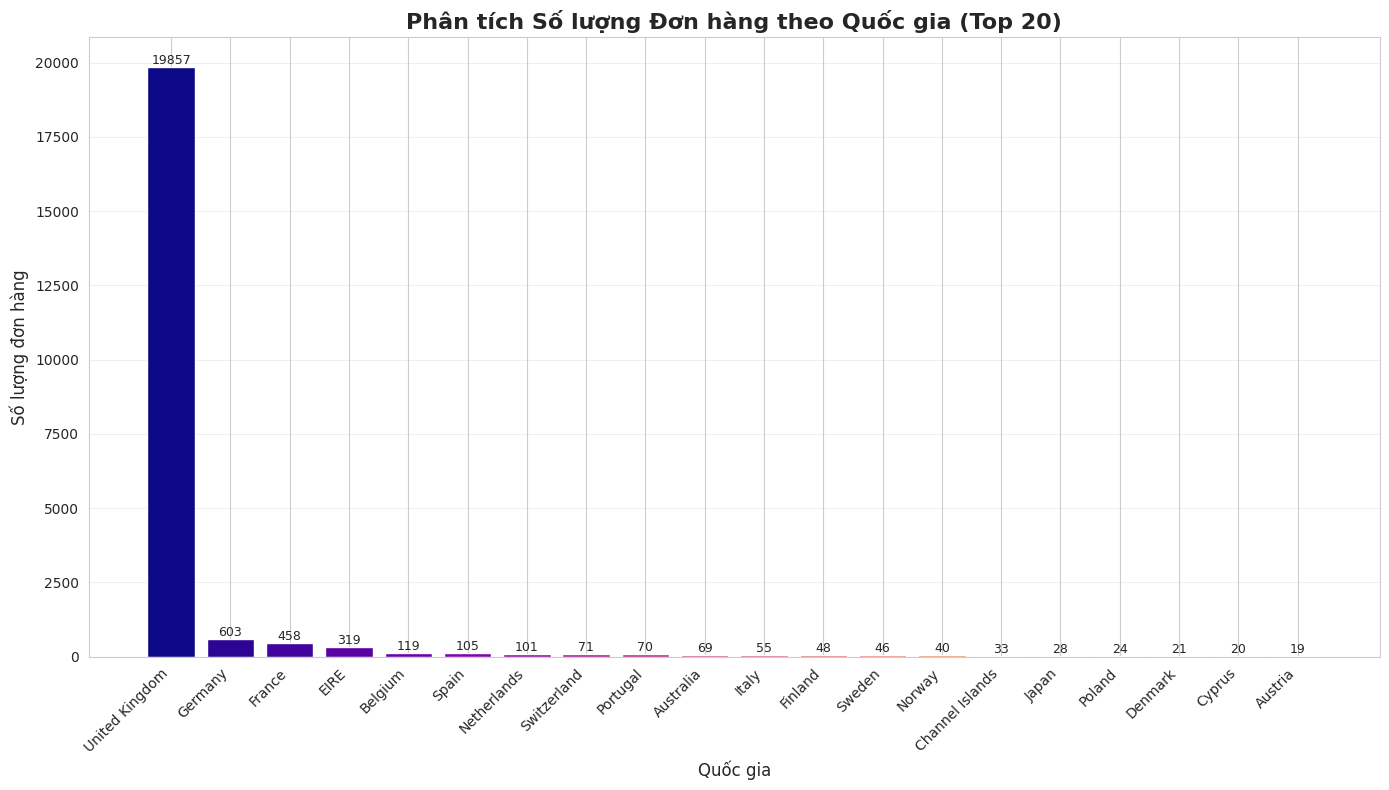

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 2. Làm sạch và chuẩn bị dữ liệu ---
# Chuyển đổi InvoiceDate sang kiểu datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Loại bỏ các dòng không có CustomerID vì chúng thường là các giao dịch không hoàn chỉnh
df.dropna(subset=['CustomerID'], inplace=True)

# --- 3. Phân tích số lượng đơn hàng theo Quốc gia ---
# Đếm số lượng hóa đơn (đơn hàng) duy nhất cho mỗi quốc gia
country_orders = df.groupby('Country')['InvoiceNo'].nunique().reset_index()
country_orders.rename(columns={'InvoiceNo': 'NumberOfOrders'}, inplace=True)

# Sắp xếp các quốc gia theo số lượng đơn hàng giảm dần
country_orders_sorted = country_orders.sort_values(by='NumberOfOrders', ascending=False)

# Lấy top 20 quốc gia để biểu đồ dễ nhìn hơn
top_20_countries = country_orders_sorted.head(20)

# --- 4. Trực quan hóa bằng biểu đồ cột với matplotlib ---
plt.figure(figsize=(14, 8))
bars = plt.bar(top_20_countries['Country'], top_20_countries['NumberOfOrders'],
               color=plt.cm.plasma(np.linspace(0, 1, len(top_20_countries))))

# Thêm tiêu đề và nhãn
plt.title('Phân tích Số lượng Đơn hàng theo Quốc gia (Top 20)', fontsize=16, fontweight='bold')
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)

# Thêm giá trị trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Xoay nhãn trục x để dễ đọc hơn
plt.xticks(rotation=45, ha='right')

# Tinh chỉnh layout
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)

# Lưu biểu đồ
plt.savefig('so_luong_quoc_gia.png', dpi=300, bbox_inches='tight', facecolor='white')

# Hiển thị biểu đồ
plt.show()

**Điểm mạnh (Insight rút ra):**
- Khách hàng nội địa (Anh) chiếm ưu thế áp đảo: Với 16,649 đơn hàng, Vương quốc Anh là nguồn khách hàng chính của siêu thị. Điều này là hoàn toàn hợp lý và dễ hiểu khi cửa hàng được đặt tại đây, phản ánh đúng đặc điểm của một doanh nghiệp bán lẻ tại địa phương.

- Có sự hiện diện của khách hàng quốc tế: Mặc dù ở mức khiêm tốn, biểu đồ cho thấy siêu thị vẫn thu hút được khách hàng từ nhiều quốc gia châu Âu khác như Đức, Pháp, Ireland, Bỉ, Tây Ban Nha...



**Sau khi đã hiểu về 'KHI NÀO' và 'Ở ĐÂU', một câu hỏi quan trọng hơn cần được trả lời: 'CÁI GÌ' đang tạo ra doanh thu và 'CÁI GÌ' đang gây ra vấn đề?**

##**3.2.Phân tích Đa biến (Multivariate Analysis)**

**Sản phẩm nào là người hùng, và sản phẩm nào là điểm yếu?**

###**3.2.1.Top 10 Sản phẩm theo Số lượng**

**Top sản phẩm bán chạy theo số lượng? Đâu là những mặt hàng phổ thông, có sức hút lớn.**



/tmp/ipython-input-2853857093.py:59: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.



=== PHÂN NHÓM SẢN PHẨM ===

Đồ chơi (2 sản phẩm):
  • Máy bay tàu lượn Thế chiến 2
  • Bộ màu vẽ mini vintage

Túi & Bao bì (3 sản phẩm):
  • Túi Jumbo họa tiết retro đỏ
  • Hộp bánh retro 72 cái
  • Hộp bánh paisley hồng 60 cái

Trang trí (3 sản phẩm):
  • Vật trang trí chim nhiều màu
  • Giá nến treo hình trái tim trắng
  • Đèn ngủ hình thỏ

Đồ dùng tiệc (1 sản phẩm):
  • Cốc đựng bắp rang

Văn phòng phẩm (1 sản phẩm):
  • Khăn giấy London 12 gói


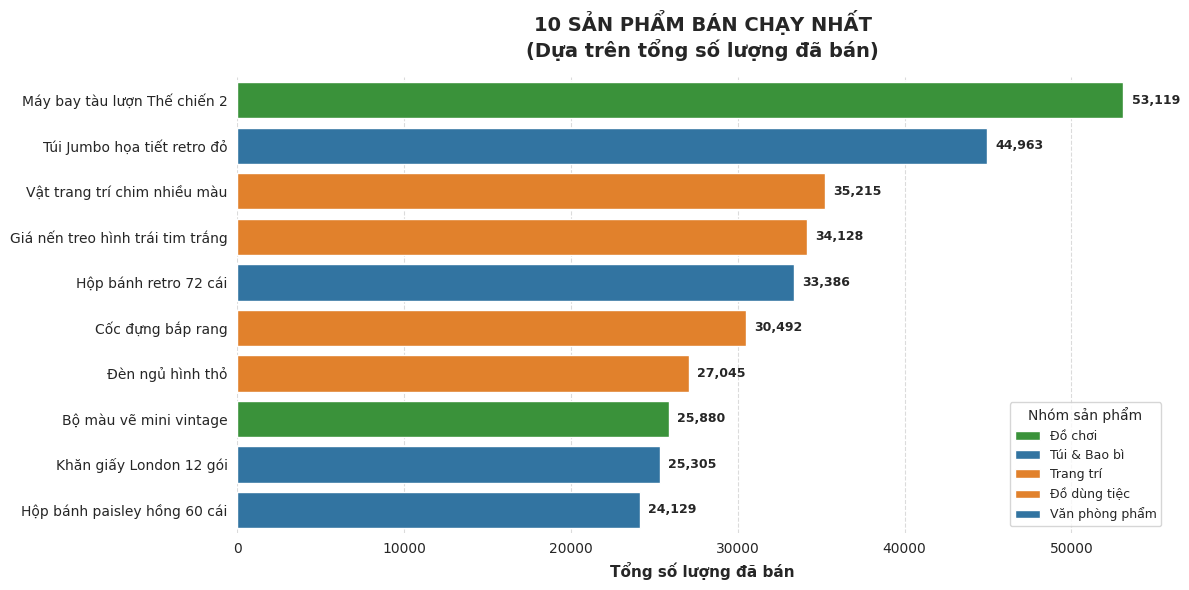

In [69]:
# Tạo dictionary để dịch và phân nhóm sản phẩm
product_translation = {
    'WORLD WAR 2 GLIDERS ASSTD DESIGNS': {'name': 'Máy bay tàu lượn Thế chiến 2', 'group': 'Đồ chơi'},
    'JUMBO BAG RED RETROSPOT': {'name': 'Túi Jumbo họa tiết retro đỏ', 'group': 'Túi & Bao bì'},
    'ASSORTED COLOUR BIRD ORNAMENT': {'name': 'Vật trang trí chim nhiều màu', 'group': 'Trang trí'},
    'WHITE HANGING HEART T-LIGHT HOLDER': {'name': 'Giá nến treo hình trái tim trắng', 'group': 'Trang trí'},
    'PACK OF 72 RETROSPOT CAKE CASES': {'name': 'Hộp bánh retro 72 cái', 'group': 'Túi & Bao bì'},
    'POPCORN HOLDER': {'name': 'Cốc đựng bắp rang', 'group': 'Đồ dùng tiệc'},
    'RABBIT NIGHT LIGHT': {'name': 'Đèn ngủ hình thỏ', 'group': 'Trang trí'},
    'MINI PAINT SET VINTAGE': {'name': 'Bộ màu vẽ mini vintage', 'group': 'Đồ chơi'},
    'PACK OF 12 LONDON TISSUES': {'name': 'Khăn giấy London 12 gói', 'group': 'Văn phòng phẩm'},
    'PACK OF 60 PINK PAISLEY CAKE CASES': {'name': 'Hộp bánh paisley hồng 60 cái', 'group': 'Túi & Bao bì'}
}

# Lấy top 10 sản phẩm
top_selling_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Tạo DataFrame mới với tên tiếng Việt và nhóm
top_products_df = pd.DataFrame({
    'English_Name': top_selling_quantity.index,
    'Total_Quantity': top_selling_quantity.values
})

# Hàm ánh xạ thông minh để xử lý khoảng trắng
def get_product_info(product_name):
    # Chuẩn hóa tên sản phẩm (loại bỏ khoảng trắng thừa)
    normalized_name = product_name.strip()

    # Thử tìm trong dictionary với tên đã chuẩn hóa
    if normalized_name in product_translation:
        return product_translation[normalized_name]
    else:
        # Nếu không tìm thấy, trả về thông tin mặc định
        return {'name': normalized_name, 'group': 'Khác'}

# Thêm thông tin dịch và nhóm với xử lý lỗi
top_products_df['Vietnamese_Name'] = top_products_df['English_Name'].map(lambda x: get_product_info(x)['name'])
top_products_df['Product_Group'] = top_products_df['English_Name'].map(lambda x: get_product_info(x)['group'])

# Kiểm tra xem có sản phẩm nào không được ánh xạ không
unmapped_products = top_products_df[top_products_df['Product_Group'] == 'Khác']
if len(unmapped_products) > 0:
    print("⚠️ Các sản phẩm chưa được ánh xạ:")
    for product in unmapped_products['English_Name']:
        print(f"   - '{product}'")

# Tạo palette màu theo nhóm
group_colors = {
    'Túi & Bao bì': '#1f77b4',
    'Trang trí': '#ff7f0e',
    'Đồ chơi': '#2ca02c',
    'Đồ dùng tiệc': '#d62728',
    'Văn phòng phẩm': '#9467bd',
    'Khác': '#7f7f7f'
}

# Vẽ biểu đồ với kích thước nhỏ hơn
plt.figure(figsize=(12, 6))  # Giảm từ (14, 8) xuống (12, 6)
bars = sns.barplot(
    x='Total_Quantity',
    y='Vietnamese_Name',
    data=top_products_df,
    palette=[group_colors[group] for group in top_products_df['Product_Group']],
    hue='Product_Group',
    legend=True
)

plt.title('10 SẢN PHẨM BÁN CHẠY NHẤT\n(Dựa trên tổng số lượng đã bán)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Tổng số lượng đã bán', fontsize=11, fontweight='bold')
plt.ylabel('')

# Thêm giá trị lên mỗi cột với font size nhỏ hơn
for i, (value, group) in enumerate(zip(top_products_df['Total_Quantity'], top_products_df['Product_Group'])):
    plt.text(value + 500, i, f'{value:,.0f}', va='center', fontsize=9, fontweight='bold')

# Tùy chỉnh legend với font size nhỏ hơn
plt.legend(title='Nhóm sản phẩm', title_fontsize=10, fontsize=9, loc='lower right')

# Loại bỏ đường viền
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị thông tin phân nhóm
print("=== PHÂN NHÓM SẢN PHẨM ===")
for group in top_products_df['Product_Group'].unique():
    group_products = top_products_df[top_products_df['Product_Group'] == group]['Vietnamese_Name'].tolist()
    print(f"\n{group} ({len(group_products)} sản phẩm):")
    for product in group_products:
        print(f"  • {product}")

plt.show()

 **Biểu đồ này cho thấy rõ ràng các sản phẩm có số lượng bán ra cao nhất, giúp xác định đâu là những mặt hàng chủ lực của doanh nghiệp.**

**Đồ Chơi Dẫn Đầu:**

- Sản phẩm "Máy bay tàu lượn Thế chiến 2" (WORLD WAR 2 GLIDERS ASSTD DESIGNS) đứng đầu với 53,119 sản phẩm đã bán, cho thấy sức hút mạnh mẽ của dòng đồ chơi mô hình lịch sử trong thị trường.

**Sự Thống Trị Của Sản Phẩm Trang trí:**

  - 4/10 sản phẩm thuộc nhóm trang trí


**Túi & Bao Bì Có Sức Bền:**

  - 4/10 sản phẩm thuộc nhóm bao bì đóng gói




###**3.2.2.Sản phẩm Bán chạy nhất theo Doanh thu (Revenue/TotalPrice)**

**Nhưng liệu những sản phẩm bán chạy có phải là những sản phẩm mang lại doanh thu cao nhất không? Hay có những sản phẩm 'quý tộc' khác, dù bán ít nhưng giá trị mỗi đơn lại rất lớn?"**

⚠️ Các sản phẩm chưa được ánh xạ:
   - 'POSTAGE'
   - 'PAPER CHAIN KIT 50'S CHRISTMAS '
=== PHÂN NHÓM SẢN PHẨM THEO DOANH THU ===

Đồ gia dụng (2 sản phẩm):
  • Giá bánh 3 tầng Regency: £132,568
  • Giỏ dã ngoại mây 60 món: £39,620

Trang trí (4 sản phẩm):
  • Giá nến treo hình trái tim trắng: £93,768
  • Vật trang trí chim nhiều màu: £56,332
  • Đèn ngủ hình thỏ: £51,043
  • Đèn trang trí hình ớt: £45,915

Túi & Bao bì (1 sản phẩm):
  • Túi Jumbo họa tiết retro đỏ: £83,057

Trang trí tiệc (1 sản phẩm):
  • Cờ trang trí tiệc: £67,628

Khác (2 sản phẩm):
  • POSTAGE: £66,710
  • PAPER CHAIN KIT 50'S CHRISTMAS: £41,424


/tmp/ipython-input-4219762664.py:60: UserWarning:

The palette list has more values (10) than needed (5), which may not be intended.



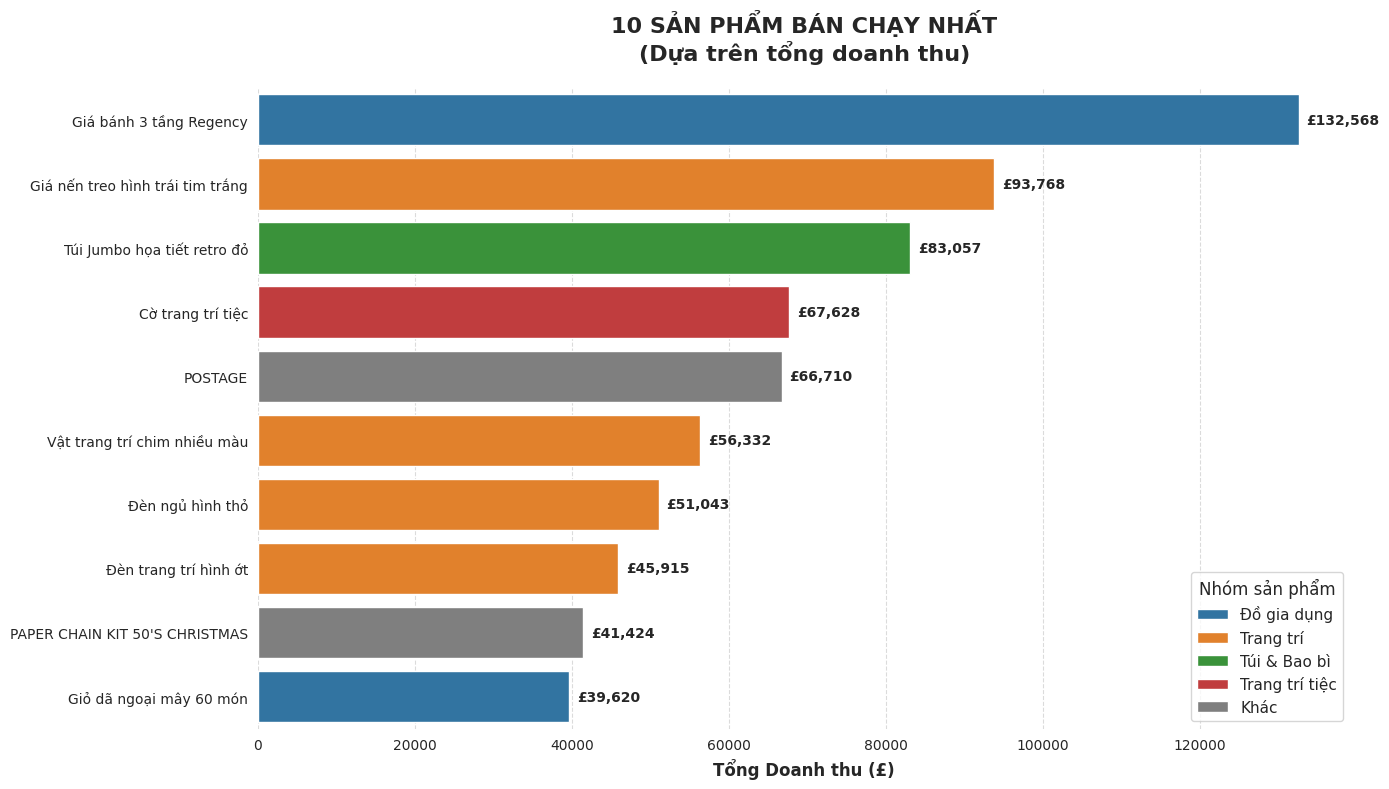

In [70]:
# Tạo dictionary để dịch và phân nhóm sản phẩm (đã bỏ POSTAGE)
product_translation_revenue = {
    'REGENCY CAKESTAND 3 TIER': {'name': 'Giá bánh 3 tầng Regency', 'group': 'Đồ gia dụng'},
    'WHITE HANGING HEART T-LIGHT HOLDER': {'name': 'Giá nến treo hình trái tim trắng', 'group': 'Trang trí'},
    'JUMBO BAG RED RETROSPOT': {'name': 'Túi Jumbo họa tiết retro đỏ', 'group': 'Túi & Bao bì'},
    'PARTY BUNTING': {'name': 'Cờ trang trí tiệc', 'group': 'Trang trí tiệc'},
    'ASSORTED COLOUR BIRD ORNAMENT': {'name': 'Vật trang trí chim nhiều màu', 'group': 'Trang trí'},
    'RABBIT NIGHT LIGHT': {'name': 'Đèn ngủ hình thỏ', 'group': 'Trang trí'},
    'CHILLI LIGHTS': {'name': 'Đèn trang trí hình ớt', 'group': 'Trang trí'},
    'PAPER CHAIN KIT 50 S CHRISTMAS': {'name': 'Bộ trang trí chuỗi giấy Giáng sinh', 'group': 'Trang trí'},
    'PICNIC BASKET WICKER 60 PIECES': {'name': 'Giỏ dã ngoại mây 60 món', 'group': 'Đồ gia dụng'}
}

# Lấy top 10 sản phẩm theo doanh thu
top_selling_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Tạo DataFrame mới với tên tiếng Việt và nhóm
top_revenue_df = pd.DataFrame({
    'English_Name': top_selling_revenue.index,
    'Total_Revenue': top_selling_revenue.values
})

# Hàm ánh xạ thông minh để xử lý khoảng trắng
def get_product_info_revenue(product_name):
    # Chuẩn hóa tên sản phẩm (loại bỏ khoảng trắng thừa)
    normalized_name = product_name.strip()

    # Thử tìm trong dictionary với tên đã chuẩn hóa
    if normalized_name in product_translation_revenue:
        return product_translation_revenue[normalized_name]
    else:
        # Nếu không tìm thấy, trả về thông tin mặc định
        return {'name': normalized_name, 'group': 'Khác'}

# Thêm thông tin dịch và nhóm với xử lý lỗi
top_revenue_df['Vietnamese_Name'] = top_revenue_df['English_Name'].map(lambda x: get_product_info_revenue(x)['name'])
top_revenue_df['Product_Group'] = top_revenue_df['English_Name'].map(lambda x: get_product_info_revenue(x)['group'])

# Lọc bỏ POSTAGE (Phí vận chuyển) khỏi kết quả
top_revenue_df = top_revenue_df[top_revenue_df['Vietnamese_Name'] != 'Phí vận chuyển']

# Kiểm tra xem có sản phẩm nào không được ánh xạ không
unmapped_products = top_revenue_df[top_revenue_df['Product_Group'] == 'Khác']
if len(unmapped_products) > 0:
    print("⚠️ Các sản phẩm chưa được ánh xạ:")
    for product in unmapped_products['English_Name']:
        print(f"   - '{product}'")

# Tạo palette màu theo nhóm (đã bỏ Dịch vụ)
group_colors_revenue = {
    'Đồ gia dụng': '#1f77b4',
    'Trang trí': '#ff7f0e',
    'Túi & Bao bì': '#2ca02c',
    'Trang trí tiệc': '#d62728',
    'Khác': '#7f7f7f'
}

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    x='Total_Revenue',
    y='Vietnamese_Name',
    data=top_revenue_df,
    palette=[group_colors_revenue[group] for group in top_revenue_df['Product_Group']],
    hue='Product_Group',
    legend=True
)

plt.title('10 SẢN PHẨM BÁN CHẠY NHẤT\n(Dựa trên tổng doanh thu)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tổng Doanh thu (£)', fontsize=12, fontweight='bold')
plt.ylabel('')

# Thêm giá trị lên mỗi cột
for i, (value, group) in enumerate(zip(top_revenue_df['Total_Revenue'], top_revenue_df['Product_Group'])):
    plt.text(value + 1000, i, f'£{value:,.0f}', va='center', fontsize=10, fontweight='bold')

# Tùy chỉnh legend
plt.legend(title='Nhóm sản phẩm', title_fontsize=12, fontsize=11, loc='lower right')

# Loại bỏ đường viền
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị thông tin phân nhóm
print("=== PHÂN NHÓM SẢN PHẨM THEO DOANH THU ===")
for group in top_revenue_df['Product_Group'].unique():
    group_products = top_revenue_df[top_revenue_df['Product_Group'] == group]['Vietnamese_Name'].tolist()
    print(f"\n{group} ({len(group_products)} sản phẩm):")
    for product in group_products:
        revenue = top_revenue_df[top_revenue_df['Vietnamese_Name'] == product]['Total_Revenue'].values[0]
        print(f"  • {product}: £{revenue:,.0f}")

plt.show()

**Những phát hiện chính:**
- Sản phẩm "Giá bánh 3 tần Regency " là sản phẩm mang lại doanh thu cao nhất. Điều này khẳng định đây là sản phẩm chủ lực, vừa được yêu thích rộng rãi vừa có giá trị cao.

- Sự Thống trị của Đồ trang trí & Gia dụng: Tương tự như phân tích theo số lượng, danh sách này tiếp tục cho thấy sức mạnh của các mặt hàng trang trí nhà cửa và quà tặng. Đây rõ ràng là danh mục sản phẩm cốt lõi của doanh nghiệp.

###**3.2.2.Phân tích các đơn hàng bị hủy/trả lại**

**Bên cạnh những thành tích, chúng ta cũng cần nhìn vào sự thật: Đâu là những sản phẩm đang gây thất thoát doanh thu nhiều nhất do bị hủy/trả lại? Hiểu được lý do đằng sau sẽ giúp chúng ta cải thiện chất lượng sản phẩm, mô tả, hoặc dịch vụ**

In [86]:
# --- 2. Lọc các đơn hàng bị hủy/trả lại ---
cancelled_orders = df[df['InvoiceNo'].astype(str).str.startswith('C')]

# --- 3. Tìm top sản phẩm bị trả lại nhiều nhất ---
top_cancelled_products = cancelled_orders['Description'].value_counts().reset_index()
top_cancelled_products.columns = ['ProductDescription', 'CancellationCount']

# =======================================================
# == BẠN THÊM CODE LỌC VÀO NGAY ĐÂY ==
# =======================================================
# 1. Tạo danh sách các mục cần loại bỏ
items_to_remove = ['POSTAGE', 'Discount', 'Manual']

# 2. Lọc ra khỏi bảng top_cancelled_products
top_cancelled_products = top_cancelled_products[~top_cancelled_products['ProductDescription'].isin(items_to_remove)]

# 3. Dịch tên sản phẩm sang tiếng Việt - SỬA LẠI CHO CHÍNH XÁC
product_translations = {
    'REGENCY CAKESTAND 3 TIER': 'GIÁ BÁNH 3 TẦNG KIỂU REGENCY',
    'JAM MAKING SET WITH JARS': 'BỘ LÀM MỨT VỚI LỌ',
    'SET OF 3 CAKE TINS PANTRY DESIGN': 'BỘ 3 KHUÔN BÁNH THIẾT KẾ PANTRY',
    'SET OF 5 CAKE TINS PANTRY DESIGN': 'BỘ 5 KHUÔN BÁNH THIẾT KẾ PANTRY',  # THÊM DÒNG NÀY
    'STRAWBERRY CERAMIC TRINKET BOX': 'HỘP TRANG SỨC CERAMIC DÂU TÂY',
    'ROSES REGENCY TEACUP AND SAUCER': 'TÁCH VÀ ĐĨA TRÀ REGENCY HOA HỒNG',
    'RECIPE BOX PANTRY YELLOW DESIGN': 'HỘP CÔNG THỨC THIẾT KẾ VÀNG PANTRY',
    'JUMBO BAG RED RETROSPOT': 'TÚI JUMBO ĐỎ RETROSPOT',
    'WOOD 2 DRAWER CABINET WHITE FINISH': 'TỦ 2 NGĂN KÉO GỖ HOÀN THIỆN TRẮNG',
    'WHITE HANGING HEART T-LIGHT HOLDER': 'GIÁ NẾN TRÁI TIM TREO TRẮNG',
    'GREEN REGENCY TEACUP AND SAUCER': 'TÁCH VÀ ĐĨA TRÀ REGENCY XANH LÁ'
}

# Áp dụng bản dịch - SỬA LẠI ĐỂ XỬ LÝ CÁC TRƯỜNG HỢP KHÔNG CÓ TRONG DICTIONARY
def translate_product_name(name):
    # Kiểm tra xem tên sản phẩm có chứa từ khóa không (không cần khớp chính xác)
    for eng_name, viet_name in product_translations.items():
        if eng_name in name:
            return viet_name
    return name  # Giữ nguyên nếu không tìm thấy bản dịch

top_cancelled_products['ProductDescription'] = top_cancelled_products['ProductDescription'].apply(translate_product_name)
# =======================================================

# Lấy top 10 sản phẩm sau khi đã lọc
top_10 = top_cancelled_products.head(10)

# In kết quả dạng bảng
print("--- Top 10 sản phẩm (đã lọc) bị trả lại/hủy nhiều nhất ---")
print(top_10)

# --- 4. Trực quan hóa kết quả ---
fig = px.bar(top_10,
             x='CancellationCount',
             y='ProductDescription',
             orientation='h', # Biểu đồ cột ngang
             title='Top 10 Sản phẩm bị Hủy/Trả lại nhiều nhất (Đã lọc)',
             labels={'ProductDescription': 'Mô tả sản phẩm', 'CancellationCount': 'Số lần bị hủy/trả lại'},
             text='CancellationCount')

# Sắp xếp các cột và tùy chỉnh giao diện
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    title_x=0.5
)
plt.savefig('huy_tra.png', dpi=300, bbox_inches='tight', facecolor='white')
fig.show()

--- Top 10 sản phẩm (đã lọc) bị trả lại/hủy nhiều nhất ---
                    ProductDescription  CancellationCount
0         GIÁ BÁNH 3 TẦNG KIỂU REGENCY                180
3                    BỘ LÀM MỨT VỚI LỌ                 86
5      BỘ 3 KHUÔN BÁNH THIẾT KẾ PANTRY                 72
6        HỘP TRANG SỨC CERAMIC DÂU TÂY                 54
7     TÁCH VÀ ĐĨA TRÀ REGENCY HOA HỒNG                 53
8   HỘP CÔNG THỨC THIẾT KẾ VÀNG PANTRY                 47
9               TÚI JUMBO ĐỎ RETROSPOT                 44
10     TÁCH VÀ ĐĨA TRÀ REGENCY XANH LÁ                 42
11         GIÁ NẾN TRÁI TIM TREO TRẮNG                 42
12   TỦ 2 NGĂN KÉO GỖ HOÀN THIỆN TRẮNG                 42


<Figure size 640x480 with 0 Axes>

**Dựa trên biểu đồ:**


- Sản phẩm "giá bánh 3 tầng kiểu regency"  có doanh thu cao nhất nhưng đồng thời cũng là sản phẩm bị hủy/trả lại nhiều nhất. Điều này cho thấy đây là một sản phẩm rất phổ biến và bán chạy, nhưng có thể gặp vấn đề về chất lượng, mô tả sản phẩm không chính xác, hoặc hư hỏng trong quá trình vận chuyển.

- Sản phẩm có rủi ro: Sản phẩm "Bộ làm mứt với lọ" cũng cần phải quan tâm đến chất lượng cần có các biện pháp để khắc phục



**Câu hỏi: lý do khách quan vì sao các sản phẩm này lại có tỉ lệ trả hàng cao?**
-  **Mua hàng theo Cảm hứng & Hối hận Ngay lập tức**. Khách hàng thấy chúng dễ thương trên kệ và mua ngay. Tuy nhiên, chỉ vài phút sau, khi đang xếp hàng thanh toán hoặc ra về, họ bắt đầu suy nghĩ lại.
- **Lỗi Sản xuất & Hư hại có sẵn**. Khách hàng có thể phát hiện ra một vết nứt nhỏ, vết rỗ men, hoặc hình in bị lệch khi kiểm tra kỹ tại cửa hàng. Họ sẽ bỏ sản phẩm đó lại và chọn sản phẩm khác
- **Chính sách Trả hàng Dễ dàng**. Cửa hàng có thể có chính sách trả hàng rất thoải mái. Điều này vô tình khuyến khích hành vi mua về dùng thử, không ưng thì trả.

##**3.3.Phân tích RFM & Phân cụm**
***Chúng ta đã nắm rõ về sản phẩm và thời gian. Nhưng để phát triển bền vững, chìa khóa nằm ở chính khách hàng. Vậy, làm thế nào để chúng ta thực sự hiểu và phân loại được khách hàng của mình?***

**RFM Analysis giúp phân nhóm khách hàng dựa trên mức độ tương tác và giá trị mang lại, từ đó doanh nghiệp:**

- Hiểu ai là khách hàng trung thành,

- Ai đang có nguy cơ rời bỏ,

- Và ai là khách hàng tiềm năng cần chăm sóc thêm.

**Tính 3 chỉ số cho từng khách hàng:**
- Recency (R): Ngày giao dịch gần nhất → tính số ngày kể từ lần mua gần nhất đến hiện tại.
→ Càng nhỏ càng tốt (mới mua gần đây).

- Frequency (F): Số lượng giao dịch (đơn hàng) trong một khoảng thời gian.
→ Càng lớn càng tốt.

- Monetary (M): Tổng tiền chi tiêu.
→ Càng lớn càng tốt.

Ngày tham chiếu cho phân tích RFM: 2011-12-10 12:50:00

--- Dữ liệu RFM của Khách hàng (5 Dòng đầu tiên) ---
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          2      0.00
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


--- Thống kê mô tả của RFM ---
         CustomerID      Recency    Frequency       Monetary
count   4372.000000  4372.000000  4372.000000    4372.000000
mean   15299.677722    92.047118     5.075480    1893.531433
std     1722.390705   100.765435     9.338754    8218.696204
min    12346.000000     1.000000     1.000000   -4287.630000
25%    13812.750000    17.000000     1.000000     291.795000
50%    15300.500000    50.000000     3.000000     644.070000
75%    16778.250000   143.000000     5.000000    1608.335000
max    18287.000000   374.000000   248.000000  279489.020000




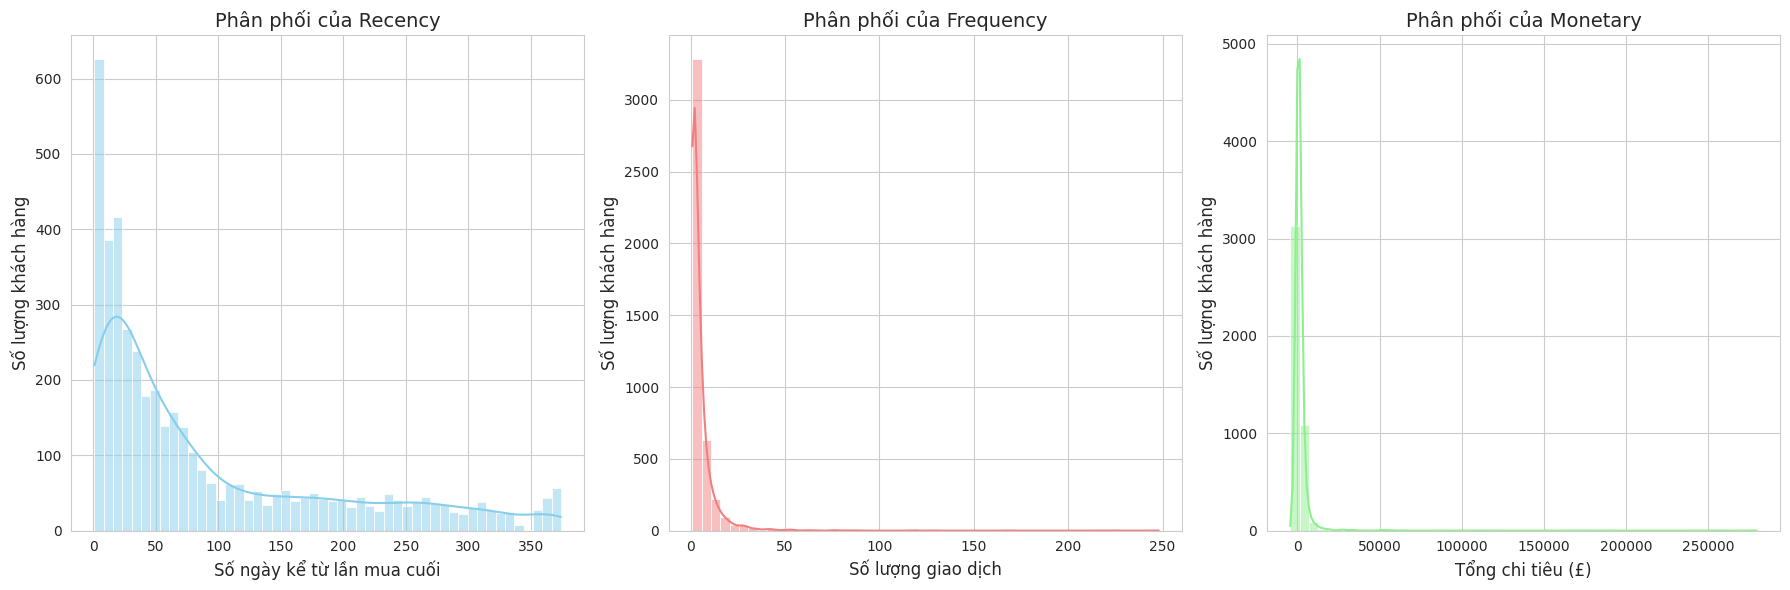

In [78]:
# 1. Xác định Ngày Tham chiếu (snapshot_date)
# Đây là mốc "hiện tại" để tính toán Recency.
# Chúng ta lấy ngày giao dịch cuối cùng trong bộ dữ liệu, sau đó cộng thêm 1 ngày.
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Ngày tham chiếu cho phân tích RFM: {snapshot_date}\n")

# 2. Tính toán các giá trị R, F, M cho mỗi CustomerID
# Sử dụng groupby() trên CustomerID và agg() để tính R, F, M
rfm_df = df.groupby('CustomerID').agg(
    # Recency: Số ngày kể từ lần mua hàng cuối cùng
    Recency=('InvoiceDate', lambda date: (snapshot_date - date.max()).days),

    # Frequency: Số lượng giao dịch (hóa đơn) duy nhất
    Frequency=('InvoiceNo', 'nunique'),

    # Monetary: Tổng số tiền đã chi tiêu
    Monetary=('TotalPrice', 'sum')
).reset_index() # reset_index() chuyển CustomerID từ chỉ mục thành cột

print("--- Dữ liệu RFM của Khách hàng (5 Dòng đầu tiên) ---")
print(rfm_df.head())
print("\n")

print("--- Thống kê mô tả của RFM ---")
print(rfm_df.describe())
print("\n")

# 3. Trực quan hóa Phân phối của RFM (Histogram)
# Giúp chúng ta hiểu sự phân bổ của khách hàng trên mỗi tiêu chí RFM
plt.figure(figsize=(18, 6)) # Kích thước lớn hơn cho 3 biểu đồ con

# Biểu đồ con cho Recency
plt.subplot(1, 3, 1) # 1 hàng, 3 cột, vị trí thứ 1
sns.histplot(rfm_df['Recency'], bins=50, kde=True, color='skyblue')
plt.title('Phân phối của Recency', fontsize=14)
plt.xlabel('Số ngày kể từ lần mua cuối', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)

# Biểu đồ con cho Frequency
plt.subplot(1, 3, 2) # 1 hàng, 3 cột, vị trí thứ 2
sns.histplot(rfm_df['Frequency'], bins=50, kde=True, color='lightcoral')
plt.title('Phân phối của Frequency', fontsize=14)
plt.xlabel('Số lượng giao dịch', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)

# Biểu đồ con cho Monetary
plt.subplot(1, 3, 3) # 1 hàng, 3 cột, vị trí thứ 3
sns.histplot(rfm_df['Monetary'], bins=50, kde=True, color='lightgreen')
plt.title('Phân phối của Monetary', fontsize=14)
plt.xlabel('Tổng chi tiêu (£)', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)

plt.tight_layout() # Tự động điều chỉnh layout để không bị chồng chéo

plt.show()



**1. Phân phối của Recency**

**Nhận xét:**
- Phần lớn khách hàng có Recency nhỏ (0–50 ngày).
→ Nghĩa là đa số khách hàng vừa mới mua gần đây.

- Một số ít khách hàng có Recency cao (200–350 ngày).
→ Đây là nhóm lâu không quay lại, có nguy cơ rời bỏ.

**Kết luận:**
- Tỷ lệ khách hàng hoạt động gần đây cao, đây là dấu hiệu tích cực.
- Tuy nhiên, cũng cần tái kích hoạt nhóm Recency cao (gửi ưu đãi, email…).

**2. Phân phối của Frequency**

**Nhận xét:**

- Đa số khách hàng chỉ mua 1–5 lần.

- Rất ít khách hàng mua hơn 50 lần (đuôi bên phải kéo dài).

**Kết luận:**

- Phần lớn là khách hàng mua ít / không thường xuyên.

- Cần chiến lược chăm sóc và khuyến khích mua lại (loyalty, voucher...).

**3. Phân phối của Monetary**

**Nhận xét:**

- Rất nhiều khách hàng chi tiêu ít tiền, nằm ở vùng thấp (gần 0).

- Một vài khách hàng chi tiêu cực lớn (đuôi dài sang phải).

**Kết luận:**

- Doanh thu chủ yếu đến từ một nhóm nhỏ khách hàng chi tiêu cao

- Nên tập trung chăm sóc đặc biệt nhóm này vì họ đóng góp phần lớn doanh thu.

###**3.3.1 Phân tích Giỏ hàng (Market Basket Analysis)**

**Trước khi đi sâu vào từng cá nhân, hãy khám phá hành vi mua sắm của họ: Những sản phẩm nào thường được mua cùng nhau?**

Đã loại bỏ các mục không phải sản phẩm.


/tmp/ipython-input-1225696131.py:15: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Chuẩn bị dữ liệu giỏ hàng hoàn tất.

Tìm kiếm các nhóm sản phẩm phổ biến hoàn tất.

Tạo các luật kết hợp hoàn tất.

--- 10 Luật Kết hợp Hàng đầu (Mạnh nhất) ---
                             antecedents  \
4      (GREEN REGENCY TEACUP AND SAUCER)   
5       (PINK REGENCY TEACUP AND SAUCER)   
6     (ROSES REGENCY TEACUP AND SAUCER )   
7      (GREEN REGENCY TEACUP AND SAUCER)   
3   (GARDENERS KNEELING PAD CUP OF TEA )   
2    (GARDENERS KNEELING PAD KEEP CALM )   
1           (ALARM CLOCK BAKELIKE GREEN)   
0            (ALARM CLOCK BAKELIKE RED )   
22   (PAPER CHAIN KIT VINTAGE CHRISTMAS)   
23     (PAPER CHAIN KIT 50'S CHRISTMAS )   

                             consequents   support  confidence       lift  
4       (PINK REGENCY TEACUP AND SAUCER)  0.021024    0.665702  26.197045  
5      (GREEN REGENCY TEACUP AND SAUCER)  0.021024    0.827338  26.197045  
6      (GREEN REGENCY TEACUP AND SAUCER)  0.024726    0.690932  21.877857  
7     (ROSES REGENCY TEACUP AND SAUCER )  0.024726

/tmp/ipython-input-1225696131.py:105: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




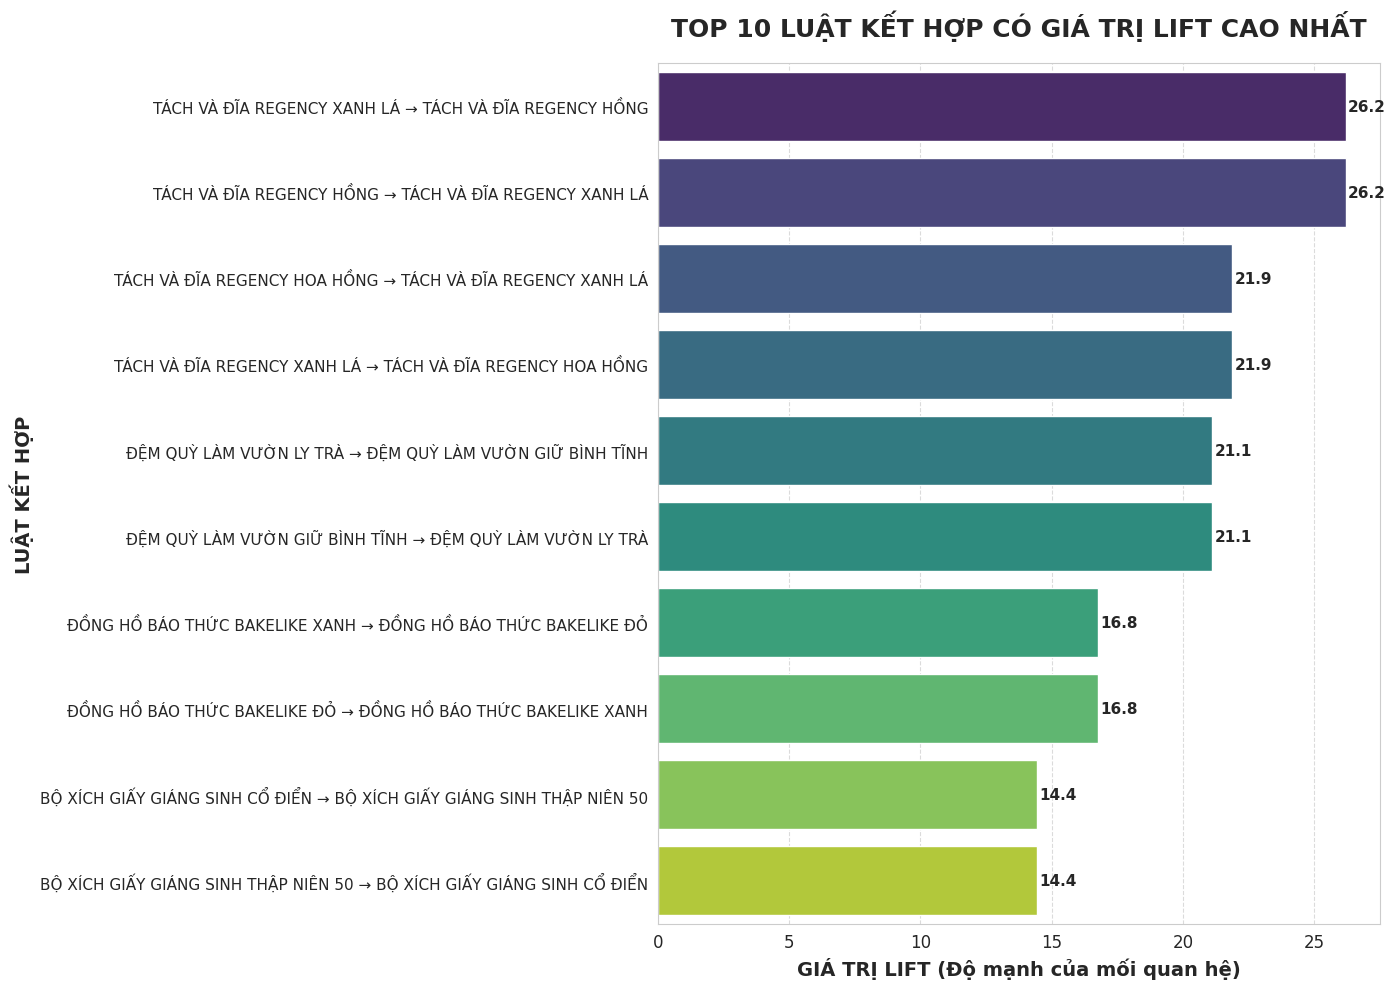

In [79]:
# Loại bỏ các mục không phải sản phẩm để kết quả phân tích chính xác hơn
non_product_items = ['POSTAGE', 'DOTCOM POSTAGE', 'CARRIAGE', 'Manual', 'BANK CHARGES']
df_mba = df[~df['Description'].isin(non_product_items)].copy()
print(f"Đã loại bỏ các mục không phải sản phẩm.")

# Tạo định dạng 'giỏ hàng' (basket) mà thuật toán Apriori yêu cầu
basket = (df_mba.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Hàm để mã hóa số lượng thành dạng nhị phân (0 hoặc 1)
def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)
print("Chuẩn bị dữ liệu giỏ hàng hoàn tất.")

# --- PHẦN 2: CHẠY THUẬT TOÁN APRIORI VÀ TẠO LUẬT KẾT HỢP ---

# Tìm các nhóm sản phẩm phổ biến
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
print("\nTìm kiếm các nhóm sản phẩm phổ biến hoàn tất.")

# Tạo các luật kết hợp từ các nhóm sản phẩm phổ biến
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sắp xếp các luật theo 'lift' và 'confidence'
rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

print("\nTạo các luật kết hợp hoàn tất.")
print("\n--- 10 Luật Kết hợp Hàng đầu (Mạnh nhất) ---")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

warnings.filterwarnings('ignore', category=DeprecationWarning)

# --- PHẦN 3: TRỰC QUAN HÓA CÁC LUẬT KẾT HỢP ---

# Tạo từ điển dịch tên sản phẩm sang tiếng Việt (ĐẦY ĐỦ VÀ ĐÃ SỬA LỖI)
translation_dict = {
    'GREEN REGENCY TEACUP AND SAUCER': 'TÁCH VÀ ĐĨA REGENCY XANH LÁ',
    'PINK REGENCY TEACUP AND SAUCER': 'TÁCH VÀ ĐĨA REGENCY HỒNG',
    'ROSES REGENCY TEACUP AND SAUCER': 'TÁCH VÀ ĐĨA REGENCY HOA HỒNG',
    'ROSES REGENCY TEACUP AND SAUCER ': 'TÁCH VÀ ĐĨA REGENCY HOA HỒNG',  # Thêm phiên bản có khoảng trắng
    'GARDENERS KNEELING PAD CUP OF TEA': 'ĐỆM QUỲ LÀM VƯỜN LY TRÀ',
    'GARDENERS KNEELING PAD CUP OF TEA ': 'ĐỆM QUỲ LÀM VƯỜN LY TRÀ',  # Thêm phiên bản có khoảng trắng
    'GARDENERS KNEELING PAD KEEP CALM': 'ĐỆM QUỲ LÀM VƯỜN GIỮ BÌNH TĨNH',
    'GARDENERS KNEELING PAD KEEP CALM ': 'ĐỆM QUỲ LÀM VƯỜN GIỮ BÌNH TĨNH',  # Thêm phiên bản có khoảng trắng
    'ALARM CLOCK BAKELIKE GREEN': 'ĐỒNG HỒ BÁO THỨC BAKELIKE XANH',
    'ALARM CLOCK BAKELIKE RED': 'ĐỒNG HỒ BÁO THỨC BAKELIKE ĐỎ',
    'ALARM CLOCK BAKELIKE RED ': 'ĐỒNG HỒ BÁO THỨC BAKELIKE ĐỎ',  # Thêm phiên bản có khoảng trắng
    'PAPER CHAIN KIT VINTAGE CHRISTMAS': 'BỘ XÍCH GIẤY GIÁNG SINH CỔ ĐIỂN',
    'PAPER CHAIN KIT 50\'S CHRISTMAS': 'BỘ XÍCH GIẤY GIÁNG SINH THẬP NIÊN 50',
    'PAPER CHAIN KIT 50\'S CHRISTMAS ': 'BỘ XÍCH GIẤY GIÁNG SINH THẬP NIÊN 50'  # Thêm phiên bản có khoảng trắng
}

# Chuẩn bị dữ liệu cho biểu đồ
top_10_rules = rules.head(10).copy()

# Hàm dịch tên sản phẩm (ĐÃ SỬA LỖI KHOẢNG TRẮNG)
def translate_product_names(product_set):
    translated = []
    for product in list(product_set):
        # Chuẩn hóa tên sản phẩm bằng cách loại bỏ khoảng trắng thừa
        normalized_product = product.strip() if isinstance(product, str) else product

        if normalized_product in translation_dict:
            translated.append(translation_dict[normalized_product])
        elif product in translation_dict:  # Thử với tên gốc (có thể có khoảng trắng)
            translated.append(translation_dict[product])
        else:
            # Nếu không tìm thấy trong từ điển, giữ nguyên và in cảnh báo
            print(f"CẢNH BÁO: Chưa có bản dịch cho '{product}'")
            translated.append(product)
    return translated

# Tạo luật kết hợp đã được dịch
top_10_rules['rule'] = top_10_rules.apply(
    lambda row: f"{', '.join(translate_product_names(row['antecedents']))} → {', '.join(translate_product_names(row['consequents']))}",
    axis=1
)

# Kiểm tra và in các sản phẩm chưa được dịch
print("\n--- KIỂM TRA BẢN DỊCH ---")
all_products = set()
for _, row in top_10_rules.iterrows():
    all_products.update(row['antecedents'])
    all_products.update(row['consequents'])

untranslated_products = []
for product in all_products:
    normalized = product.strip() if isinstance(product, str) else product
    if normalized not in translation_dict and product not in translation_dict:
        untranslated_products.append(product)

if untranslated_products:
    print("Các sản phẩm CHƯA ĐƯỢC DỊCH:")
    for product in untranslated_products:
        print(f"  - '{product}'")
else:
    print("🎉 TẤT CẢ sản phẩm đã được dịch!")

# Thiết lập phong cách và vẽ biểu đồ với kích thước lớn hơn
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
sns.barplot(x='lift', y='rule', data=top_10_rules, palette='viridis')

# Tăng kích thước font chữ
plt.title('TOP 10 LUẬT KẾT HỢP CÓ GIÁ TRỊ LIFT CAO NHẤT', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('GIÁ TRỊ LIFT (Độ mạnh của mối quan hệ)', fontsize=14, fontweight='bold')
plt.ylabel('LUẬT KẾT HỢP', fontsize=14, fontweight='bold')

# Tăng kích thước font cho các nhãn trên trục
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)

# Thêm grid và cải thiện giao diện
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Điều chỉnh layout để không bị cắt mất nội dung
plt.tight_layout()

# Hiển thị giá trị lift trên mỗi cột
for i, v in enumerate(top_10_rules['lift']):
    plt.text(v + 0.1, i, f'{v:.1f}', va='center', fontsize=11, fontweight='bold')

plt.show()



**Những phát hiện chính:**
- Xu hướng mua hàng rõ rệt: Khách hàng có xu hướng mua các sản phẩm này cùng nhau một cách có chủ đích.
- Đặc điểm chung của các cặp sản phẩm: Hầu hết là các sản phẩm bổ sung, thay thế hoặc cùng thuộc một bộ sưu tập. Cụ thể:

  - Sản phẩm cùng loại, khác mẫu mã/màu sắc: Tách trà Regency (màu hồng, xanh lá, họa tiết hoa hồng), Đồng hồ báo thức Bakelike (đỏ & xanh), Bộ đồ trang trí Giáng sinh (Vintage & 50's).

  - Sản phẩm cùng chủ đề, khác kiểu dáng: Tấm quỳ làm vườn (Kiểu "Cup of Tea" & "Keep Calm").

**Gợi ý Hành động 💡**

Phát hiện này cung cấp những gợi ý rất cụ thể và dễ thực hiện để thúc đẩy doanh số:

- Tạo Combo Khuyến mãi: Xây dựng các gói sản phẩm như "Mua bộ 3 tách trà được giảm giá" hoặc "Mua 2 tặng 1" để khuyến khích khách hàng mua trọn bộ.

- Gợi ý Sản phẩm (Cross-selling): Trên trang web, khi khách hàng xem sản phẩm tách trà màu Hồng, hãy hiển thị gợi ý "Thường được mua cùng" với màu Xanh và màu Hoa hồng ngay bên cạnh.

- Chiến dịch Marketing: Triển khai các chiến dịch email hoặc quảng cáo nhắm vào những khách hàng đã mua một màu, khuyến khích họ "hoàn thành bộ sưu tập" của mình.

- Trưng bày Sản phẩm: Tại cửa hàng vật lý, hãy đặt các sản phẩm này cạnh nhau để khách hàng dễ dàng nhìn thấy và lựa chọn cả bộ.

###**3.3.2.Kmeans**

**Bây giờ, ta sử dụng mô hình RFM để phân loại khách hàng một cách khoa học:**

####**3.3.2.1.CHUẨN HÓA DỮ LIỆU RFM**

In [50]:

# K-Means rất nhạy cảm với sự khác biệt về thang đo của dữ liệu (ví dụ: Monetary có thể lớn hơn Recency rất nhiều).
# StandardScaler sẽ đưa tất cả các biến về cùng một thang đo.
scaler = StandardScaler()
rfm_scaled = pd.DataFrame(scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']]),
                          columns=['Recency', 'Frequency', 'Monetary'])

print("--- Dữ liệu RFM sau khi chuẩn hóa (5 dòng đầu) ---")
print(rfm_scaled.head())
print("-" * 50)

--- Dữ liệu RFM sau khi chuẩn hóa (5 dòng đầu) ---
    Recency  Frequency  Monetary
0  2.322023  -0.329362 -0.230420
1 -0.893733   0.206102  0.294055
2 -0.169196  -0.115176 -0.011717
3 -0.725005  -0.436455 -0.016547
4  2.163220  -0.436455 -0.189727
--------------------------------------------------


####**3.3.2.2.TÌM SỐ CỤM TỐI ƯU (K) BẰNG PHƯƠNG PHÁP ELBOW**

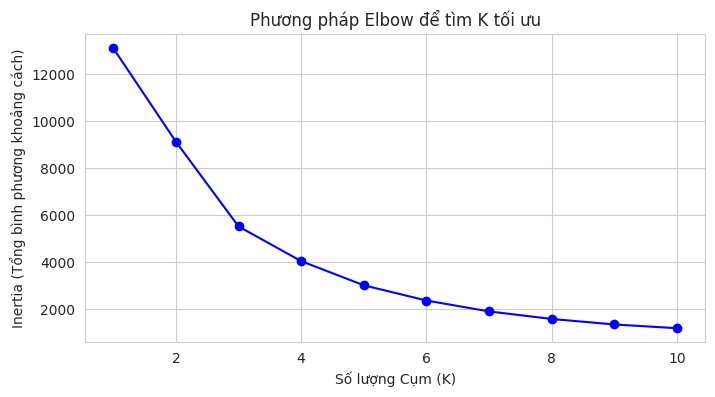

In [80]:

# Phương pháp này giúp xác định số lượng cụm (K) tốt nhất cho dữ liệu.
# "Khuỷu tay" (Elbow) trên biểu đồ là điểm K tối ưu.

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10) # n_init=10 để tránh kết quả xấu do khởi tạo ngẫu nhiên
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Số lượng Cụm (K)")
plt.ylabel('Inertia (Tổng bình phương khoảng cách)')
plt.title('Phương pháp Elbow để tìm K tối ưu')
plt.grid(True)


plt.show()


**Sau khi chuẩn hóa dữ liệu (3.3.2.1) và tìm ra số cụm tối ưu (3.3.2.2), chúng ta sẽ phân nhóm khách hàng (3.3.2.3)**

####**3.3.2.3.ÁP DỤNG K-MEANS VÀ GÁN NHÃN CỤM**

In [82]:
# Dựa vào biểu đồ Elbow, chúng ta chọn số cụm K tối ưu (ví dụ: K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Gán nhãn cụm cho mỗi khách hàng vào DataFrame RFM ban đầu
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

print(f"\n--- Phân khách hàng vào {optimal_k} cụm hoàn tất ---")
print(rfm_df.head())
print("-" * 50)


--- Phân khách hàng vào 4 cụm hoàn tất ---
   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          2      0.00        1
1     12347.0        2          7   4310.00        0
2     12348.0       75          4   1797.24        0
3     12349.0       19          1   1757.55        0
4     12350.0      310          1    334.40        1
--------------------------------------------------


####**3.3.2.4.PHÂN TÍCH VÀ DIỄN GIẢI CÁC CỤM**

**Mỗi nhóm khách hàng này có đặc điểm gì? Ai là 'VIP', ai là 'Khách hàng tiềm năng', và ai đang 'ngủ quên'? Mỗi nhóm cần một chiến lược chăm sóc khác nhau.**

In [83]:
cluster_analysis = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# 2. Thêm cột 'Interpretation' (Diễn giải) thủ công
# LƯU Ý: Thứ tự của các diễn giải này phải tương ứng với Cluster 0, 1, 2, 3...
# Bạn cần xem kết quả từ bước 1 để xác định đúng đặc điểm cho mỗi cụm.
interpretations = [
    "🟡 Average customers - khách hàng trung bình, mua sắm gần đây vừa phải, tần suất và chi tiêu không cao.",
    "🔴 At risk / Churned - khách hàng có nguy cơ rời bỏ, đã lâu không hoạt động, tần suất và chi tiêu thấp.",
    "🟢 Champions / VIPs - khách hàng VIP, mua rất gần đây, rất thường xuyên và chi tiêu cực lớn.",
    "🔵 Loyal Customers - khách hàng trung thành, hoạt động tích cực, mua hàng thường xuyên và chi tiêu mạnh."
]

# Gán danh sách diễn giải vào cột mới
cluster_analysis['Interpretation'] = interpretations

# (Tùy chọn) Đổi tên cột để thêm các mũi tên cho giống với hình ảnh
cluster_analysis.rename(columns={
    'Recency': 'Recency ↓',
    'Frequency': 'Frequency ↑',
    'Monetary': 'Monetary ↑'
}, inplace=True)


# 3. Hiển thị bảng kết quả cuối cùng
# Trong Jupyter Notebook/Colab, chỉ cần gọi tên DataFrame là nó sẽ hiển thị đẹp
cluster_analysis

,Cluster,Recency ↓,Frequency ↑,Monetary ↑,Interpretation
0,0,41.606500,4.802461,1472.653251,"🟡 Average customers - khách hàng trung bình, m..."
1,1,247.951242,1.805888,451.802991,🔴 At risk / Churned - khách hàng có nguy cơ rờ...
2,2,7.666667,89.000000,182108.075000,"🟢 Champions / VIPs - khách hàng VIP, mua rất g..."
3,3,9.181818,40.672727,18435.663364,"🔵 Loyal Customers - khách hàng trung thành, ho..."


####**3.3.2.5.TRỰC QUAN HÓA CÁC CỤM BẰNG PCA**

**Hình ảnh trực quan hóa bằng PCA sẽ cho chúng ta thấy một cách rõ ràng các nhóm khách hàng có thực sự tách biệt và khác biệt hay không.**

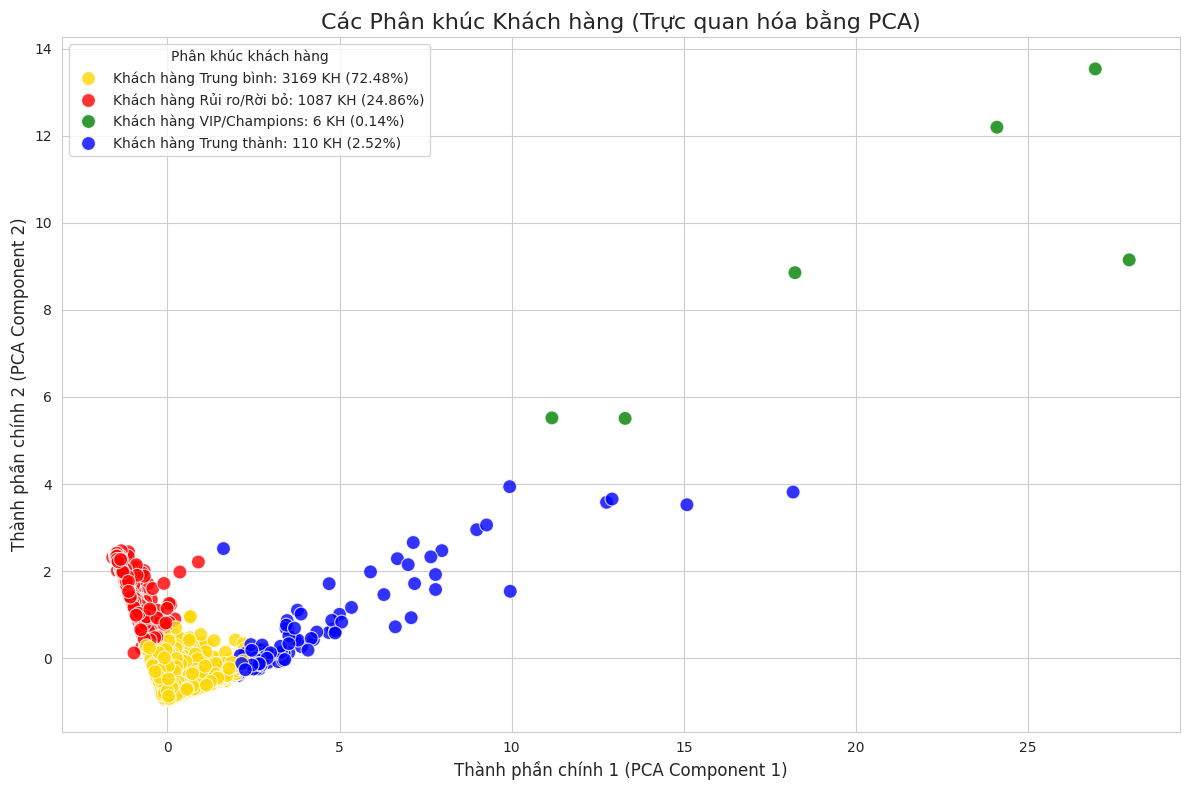

In [84]:
# Giảm chiều dữ liệu từ 3D (R, F, M) xuống 2D để vẽ biểu đồ
# Giả định rfm_scaled và rfm_df['Cluster'] đã có từ các bước trước
# --- BẮT ĐẦU CODE VẼ BIỂU ĐỒ ĐÃ CẬP NHẬT ---

# 1. Giữ nguyên phần tính toán PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

# 2. Định nghĩa tên và màu sắc cho từng cụm
cluster_names = {
    0: 'Khách hàng Trung bình',   # Tương ứng với màu 'gold'
    1: 'Khách hàng Rủi ro/Rời bỏ', # Tương ứng với màu 'red'
    2: 'Khách hàng VIP/Champions',# Tương ứng với màu 'green'
    3: 'Khách hàng Trung thành'    # Tương ứng với màu 'blue'
}
custom_palette = {
    0: 'gold',
    1: 'red',
    2: 'green',
    3: 'blue'
}

# 3. Tính toán số lượng và phần trăm
cluster_counts = rfm_df['Cluster'].value_counts()
cluster_percentages = rfm_df['Cluster'].value_counts(normalize=True) * 100

# 4. Tạo nhãn mới cho phần chú thích (legend)
# Sắp xếp theo thứ tự cluster (0, 1, 2, 3) để đảm bảo khớp với màu sắc
legend_labels = []
for cluster_id in sorted(cluster_counts.index):
    name = cluster_names[cluster_id]
    count = cluster_counts[cluster_id]
    percent = cluster_percentages[cluster_id]
    # Tạo chuỗi văn bản mới, ví dụ: "Khách hàng VIP: 500 KH (25.00%)"
    label = f"{name}: {count} KH ({percent:.2f}%)"
    legend_labels.append(label)

# 5. Vẽ biểu đồ
plt.figure(figsize=(12, 8)) # Tăng kích thước để có không gian cho chú thích
ax = sns.scatterplot(x=pca_components[:, 0],
                     y=pca_components[:, 1],
                     hue=rfm_df['Cluster'],
                     palette=custom_palette,
                     s=100,
                     alpha=0.8)

# 6. Cập nhật chú thích với thông tin mới
# Lấy các handles (chấm màu) từ legend cũ và gán nhãn mới mà chúng ta đã tạo
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, legend_labels, title='Phân khúc khách hàng', fontsize=10)

# 7. Hoàn thiện biểu đồ
plt.title('Các Phân khúc Khách hàng (Trực quan hóa bằng PCA)', fontsize=16)
plt.xlabel('Thành phần chính 1 (PCA Component 1)', fontsize=12)
plt.ylabel('Thành phần chính 2 (PCA Component 2)', fontsize=12)
plt.grid(True)
plt.tight_layout() # Tự động điều chỉnh cho vừa vặn

plt.show()

# --- KẾT THÚC CODE VẼ BIỂU ĐỒ ĐÃ CẬP NHẬT ---

 **Đánh Giá Tình Hình Hiện Tại**

**Nhìn chung:** Cơ sở khách hàng đang ở trạng thái cảnh báo, với một tỷ lệ rất lớn khách hàng sắp rời bỏ và một nhóm khách hàng trung thành/VIP quá mỏng.

- **Điểm BÁO ĐỘNG ĐỎ:** "Khách hàng Rủi ro/Rời bỏ" chiếm tới 24.87%.

  - Đây là một con số cực kỳ lớn, cho thấy gần 1/4 tổng số khách hàng đang không hài lòng, ít giao dịch hoặc sắp ngừng mua hàng.

- **Điểm YẾU:** Nhóm khách hàng giá trị cao quá ít.

  - Khách hàng VIP/Champions chỉ có 0.14% (6 người): Nhóm này là "con gà đẻ trứng vàng" nhưng lại cực kỳ ít.

  - Khách hàng Trung thành chỉ có 2.52%: Tỷ lệ này cho thấy khả năng giữ chân khách hàng (Customer Retention) đang rất kém.

 **Điểm CẦN CẢI THIỆN:** Nhóm "Khách hàng Trung bình" chiếm đa số (72.48%).

  - Đây là nhóm tiềm năng nhất để "nuôi dưỡng" và nâng cấp lên các phân khúc cao hơn. Hiện tại, họ đang ở trạng thái trung lập và dễ dàng chuyển sang nhóm "Rủi ro" nếu không được chăm sóc tốt.

#**4. Kết luận**

##**4.1. Kết Luận Chính**

- **Xu hướng thời gian:** Doanh thu có sự biến động rõ rệt theo tháng (cao điểm vào tháng 11), theo ngày (thứ Ba và thứ Năm là cao nhất) và theo khung giờ (10:00-12:00 là "giờ vàng").

- **Củng cố thị trường nội địa:** Tiếp tục các chương trình khuyến mãi, hậu mãi để giữ chân lượng khách hàng trung thành tại Anh.
- **Khai thác thị trường quốc tế tiềm năng:** Có thể nghiên cứu các chiến dịch marketing nhắm mục tiêu đến các nhóm khách hàng quốc tế có tần suất mua hàng cao nhất (như Đức, Pháp), ví dụ như hỗ trợ thêm các ngôn ngữ của họ

- **Vấn đề hủy/trả hàng:** Tỷ lệ hủy và trả hàng đang là một điểm yếu cần được cải thiện thông qua việc quản lý kỳ vọng khách hàng và điều chỉnh chính sách.

- **Hành vi mua hàng:** Khách hàng có xu hướng mua kết hợp các sản phẩm nhất định với nhau, đây là cơ hội để thúc đẩy giá trị đơn hàng.

- **Phân khúc khách hàng:**

  - Nhóm VIP (chỉ 6 người) là tài sản quý giá nhất.

  - Nhóm khách hàng Trung bình và Rủi ro chiếm tới 95% tổng số, có hành vi mong manh và dễ mất đi, cần chiến lược tác động phù hợp.

##**4.2. Đề Xuất Giải Pháp Cho Nhà Sản Xuất.**

**Dựa trên các insights trên, đây là những hành động cụ thể dành cho các nhà sản xuất để tối ưu hóa hoạt động:**

**1. Tối Ưu Hóa Lịch Trình Sản Xuất & Quản Lý Kho:**

- Căn cứ vào xu hướng theo tháng/ngày/giờ, nhà sản xuất cần điều phối sản xuất và dự trữ nguyên vật liệu để đáp ứng nhu cầu cao điểm (tháng 11, thứ Ba, thứ Năm, khung giờ 10-12h), đồng thời tránh lãng phí trong thời gian thấp điểm.

- Đảm bảo sẵn sàng số lượng lớn các sản phẩm bán chạy và linh kiện cho các sản phẩm combo trước các thời điểm này.

**2. Phát Triển Sản Phẩm & Combo Chiến Lược:**

- Tích cực phát triển các combo sản phẩm hoặc set quà tặng dựa trên xu hướng mua hàng kết hợp của khách hàng.

- Thiết kế bao bì, quy cách sản phẩm phù hợp cho các combo này để hỗ trợ cho các chiến dịch khuyến mãi ("Mua 2 giảm giá" hoặc "Combo tặng kèm").

**3. Nâng Cao Chất Lượng Sản Phẩm & Thông Tin:**

- Để giảm thiểu tỷ lệ trả hàng, nhà sản xuất cần cung cấp đầy đủ và chính xác thông tin, hình ảnh, hướng dẫn sử dụng cho từng sản phẩm. Điều này giúp nhân viên bán hàng trở thành "chuyên gia tư vấn" và quản lý kỳ vọng của khách hàng.

- Phối hợp với bộ phận bán hàng để thu thập phản hồi về lý do trả hàng, từ đó có kế hoạch cải tiến thiết kế, chất liệu hoặc chức năng sản phẩm kịp thời.

**4. Đa Dạng Hóa Thị Trường & Hỗ Trợ Xuất Khẩu:**

- Nhận thấy rủi ro từ việc phụ thuộc vào thị trường Anh, nhà sản xuất cần chủ động nghiên cứu và điều chỉnh sản phẩm cho phù hợp với tiêu chuẩn, thị hiếu của các thị trường tiềm năng như Đức, Pháp (ví dụ: thiết kế, ngôn ngữ trên bao bì, tiêu chuẩn điện...).

**5. Hỗ Trợ Chương trình cho Khách Hàng VIP:**

- Dành cho nhóm khách hàng VIP (6 người), nhà sản xuất có thể xem xét sản xuất các sản phẩm giới hạn, phiên bản đặc biệt, hoặc cá nhân hóa để nâng cao trải nghiệm và giữ chân những khách hàng quan trọng này.